In [8]:
import pandas as pd
%matplotlib inline
#notebook
import numpy as np
import matplotlib.pyplot as plt
import plotto
import imp

%run ragagnin2018.ipynb

imp.reload(plotto)
ureg = plotto.ureg()
simul = plotto.query("/tmp/antonio/magneticum.sql.faster")
ureg.define('hubble = %f'%(simul("select h from simulation").h[0]))



In [9]:
simul ("""
            select snap.id as snap_id,*
            from simulation
            inner join snap on snap.simulation_id=simulation.id
            inner join (
                select fof.snap_id as id,count(*) as count
                from fof
                where resolvness > 0
                group by fof.snap_id
            ) as A on A.id = snap.id
       """)


,snap_id,id,name,box_size,h,id,name,redshift,a,simulation_id,tag,id,count
0,1,1,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/m...,2688000.0,0.704,1,037,2.220446e-16,1.000000,1,z0,1,40076
1,2,1,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/m...,2688000.0,0.704,2,025,4.661420e-01,0.682062,1,z05,2,9542
2,3,1,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/m...,2688000.0,0.704,3,014,1.166085e+00,0.461662,1,z1,3,348
3,4,1,/smgpfs/work/pr83li/lu78qer5/Magneticum/Box0/m...,2688000.0,0.704,4,012,1.467036e+00,0.405345,1,z15,4,53
4,5,2,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,5,037,2.220446e-16,1.000000,2,z0,5,44537
5,6,2,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,6,025,4.701941e-01,0.680182,2,z05,6,11311
6,7,2,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,7,014,1.178895e+00,0.458948,2,z1,7,486
7,8,2,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,8,012,1.477581e+00,0.403619,2,z15,8,93
8,9,2,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,9,010,1.980082e+00,0.335561,2,z2,9,9
9,10,3,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,10,031,2.520891e-01,0.798665,3,z0,10,156110


In [20]:
all_df_z0 = simul ("""
    select  fof.mcri, fof.tgas4, pp.* , fof.glen, fof.rcri
    from pp
    inner join fof on fof.snap_id=pp.snap_id and fof.id_cluster = pp.id_cluster
    inner join snap on  pp.snap_id = snap.id
    
     
    and snap.tag='z0'
    and snap.id in (5,10,15)  
    """)



In [21]:

display(len(all_df_z0))


202492

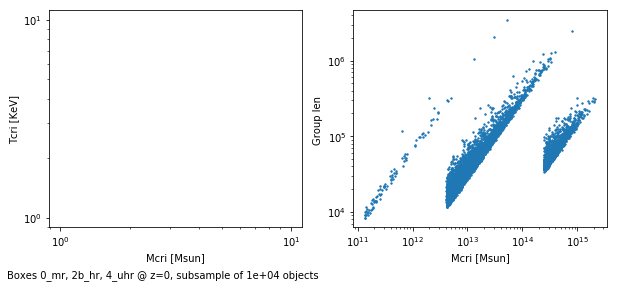

In [22]:
n_subsample = 10000
rdf = all_df_z0.sample(n=n_subsample)
f,a12 = plt.subplots(1,2, figsize=(10,4))
a1=a12[0]
a2=a12[1]
f.subplots_adjust(hspace=0)
a1.scatter( (ureg.gmass*rdf.mcri).to('Msun'),rdf.tgas4,s=2) #c=rdf.redshift, s=2)
a1.set_xscale('log')
a1.set_yscale('log')
a1.set_xlabel("Mcri [Msun]")
a1.set_ylabel("Tcri [KeV]")

a2.scatter( (ureg.gmass*rdf.mcri).to('Msun'),rdf.glen, s=2) #c=rdf.redshift, s=2)
a2.set_xscale('log')
a2.set_yscale('log')
a2.set_xlabel("Mcri [Msun]")
a2.set_ylabel("Group len ")
f.text(.5, -0.05, "Boxes 0_mr, 2b_hr, 4_uhr @ z=0, subsample of %.0e objects"%(n_subsample), ha='right')

None

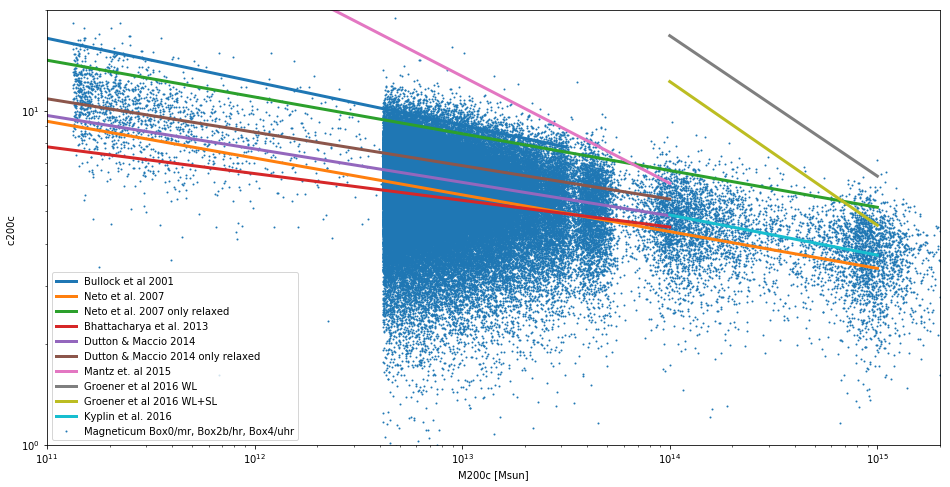

In [13]:

    
fig,a = plt.subplots(1,1, figsize=(16,8))
df=all_df_z0#.sample(n=100000)
#colormap, norm = plotto.gen_supermap(all_df_z0.fossilness)
a.scatter((ureg.gmass*df.mcri).to('Msun'),df.c200c, s=1, label='Magneticum Box0/mr, Box2b/hr, Box4/uhr') #c=rdf.redshift, s=2)

for interp_observation_name in interp_observations:
        obs = interp_observations[interp_observation_name]
        x = np.logspace(obs.xrange[0],obs.xrange[1],3)
        
        y = sc(obs.c8e14,obs.B)(x)
        a.plot(x,y, linewidth=3, label=interp_observation_name)

set_Mc_lims(a)


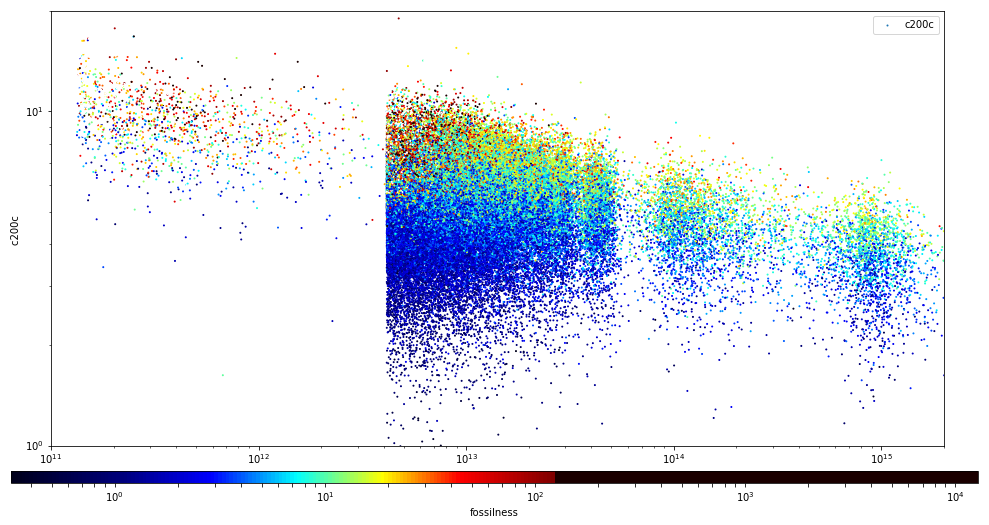

In [11]:
fig,a = plt.subplots(1,1, figsize=(16,8))
df=all_df_z0#.sample(n=100000)
colormap, norm = plotto.gen_supermap(all_df_z0.fossilness)
scatter = a.scatter((ureg.gmass*df.mcri).to('Msun'),df.c200c, c= df.fossilness, s=1, cmap=colormap, norm=norm) #c=rdf.redshift, s=2)



cbar_ax = fig.add_axes([0.09, 0.06, 0.84, 0.02])
fig.colorbar(scatter, label="fossilness",cax=cbar_ax,  orientation='horizontal')
set_Mc_lims(a)

In [47]:
from IPython.display import display

rsfac = 0.46556
NFW = lambda r,rho0,rs: rho0/((r/rs)*(1.+r/rs)**2.)

subs = all_df_z0[(all_df_z0.id_cluster.isin(range(1,100))) & (all_df_z0.snap_id==5)]
for sub in subs.iterrows():
    sub = sub[1]
    display(NFW(sub.rcri, sub.c200c_rho0, sub.c200c_rs))


0.00047760334608972264

0.00048284442775797483

0.00043900923012248506

0.0005012031388273548

0.0005464759911629699

0.00041462749078201685

0.0004335408793305918

0.0004684308926981852

0.00044539085427466613

0.000478947837561049

0.00040982025080928494

0.0004463417487424827

0.00046296305157230973

0.00043070194514312064

0.000501471740526432

0.00037143361090658113

0.00044012391650741147

0.0004175657696627466

0.0004836394726402454

0.00043312757417006485

0.00045316328334548165

0.00047621466461995345

0.00044134756075655006

0.0004173700848436058

0.0004563030521259686

0.0004313240529349316

0.00039492708294753257

0.0004792536279585749

0.00042881905733415705

0.00040816845704309335

0.0004619668384635027

0.00045602239586948703

0.00043220934229253435

0.00043487048022583004

0.0005011707923095731

0.0004722841462960669

0.0005234343846168039

0.0004620639520294006

0.0005446807868038652

0.0004435954498335942

0.00040543778028681636

0.0004139391146803757

0.00045023700536838085

0.0004218256929304712

0.0005186483372900822

0.00042023570030150134

0.0004299458920665794

0.0005106094084274468

0.00043505032005142154

0.0004713106616170003

0.00045773115313419376

0.0004784848241811116

0.00045145440398220685

0.0004277049864075039

0.00044610525794853165

0.0005197678648670934

0.0004376038772800801

0.0005175996880312053

0.00042230235767893665

0.00043879650725010567

0.00043573591165694614

0.00046758591284714137

0.0004410094957154497

0.000463329197074566

0.0004144900168751101

0.0005968044151988432

0.0005178974953486448

0.0005592035985465347

0.00043521980261201226

0.0004432781315797981

0.0005404080602768955

0.00045899482328416995

0.0003929112100508558

0.0004255126723186444

0.00042114728503461914

0.0005043847757620347

0.000494779382480652

0.0005049249893539251

0.00043541024103875824

0.0004734320692283356

0.00045256180482490847

0.00042409464525306167

0.0003979200322332308

0.0003985656234227133

0.0004571425584935136

0.00046101443337650026

0.00045479020736605017

0.00048743154037468345

0.00044141432722723435

0.00044539234488028917

0.0004175607968335394

0.0004700628654186042

0.0003858224081096043

0.0004195872806360777

0.00043208486494028585

0.0004362782915969513

0.00044326918715906476

0.00041022592985523427

0.000512636553106009

In [ ]:
xdf = simul ("""
select fof.id_cluster,fof.mcri from fof 
inner join galaxy on galaxy.id_cluster = fof.id_cluster and galaxy.snap_id = fof.snap_id
 where   galaxy.snap_id = 1 and fof.snap_id = 1 and
 fof.mcri>.7e15/1e10 and
  galaxy.msub>fof.mcri*0.1

""")




In [ ]:
def counts(df, n):
    ids, counts = np.unique(df.id_cluster,return_counts =True)
    count = len(ids[counts>=n])
    print("FoF groups with %.2e < Mcri/h < %.2e and with %d massive galaxies: %d "%(np.min(df.mcri)*1e10, np.max(df.mcri)*1e10, n, count))

counts(xdf, 3)
counts(xdf, 4)
counts(xdf, 5)